In [1]:
import pandas as pd
import ast
from matplotlib import pyplot as plt

In [29]:
df_wiki = pd.read_csv("../dat/wiki/graph.csv")
df_llm = pd.read_json("../dat/llm/graph.json")
df_textbook = pd.read_json("../dat/textbooks/graph.json").iloc[:,[0,3]]
df_textbook.columns=['concept','dep_articles_textbook']
df_wiki.dep_articles = [[dep[1] for dep in ast.literal_eval(deps)] for deps in (df_wiki.dep_articles)]


In [30]:
deps = pd.merge(df_wiki[['concept', 'dep_articles']], df_llm[['concept', 'dep_articles']], on="concept", suffixes=('_wiki', '_llm'))
deps = pd.merge(deps[['concept', 'dep_articles_wiki', 'dep_articles_llm']], df_textbook[['concept', 'dep_articles_textbook']], on="concept")

In [31]:
def get_number_common_concepts(concept, first, second):
    deps1 = set(first)
    deps2 = set(second)
    if len(deps1.intersection(deps2)):
        #print(f"{concept}: {first} vs {second}")
        pass
    return len(deps1.intersection(deps2))

deps['num_common_tb_wiki'] = deps.apply(lambda r: get_number_common_concepts(r.concept, r.dep_articles_textbook, r.dep_articles_wiki), axis=1)
deps['num_common_tb_llm'] = deps.apply(lambda r: get_number_common_concepts(r.concept, r.dep_articles_textbook, r.dep_articles_llm), axis=1)
deps['num_common_llm_wiki'] = deps.apply(lambda r: get_number_common_concepts(r.concept, r.dep_articles_llm, r.dep_articles_wiki), axis=1)

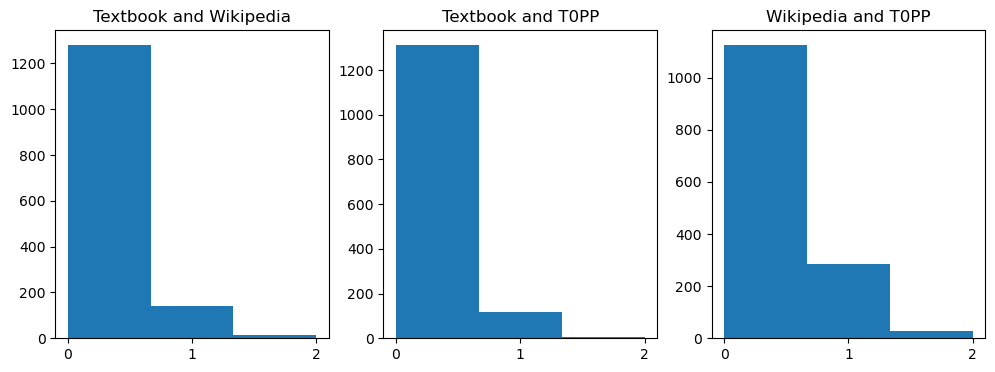

In [32]:
figs, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].set_title("Textbook and Wikipedia")
ax[0].hist(deps['num_common_tb_wiki'], bins=3)
ax[1].set_title("Textbook and T0PP")
ax[1].hist(deps['num_common_tb_llm'], bins=3)
ax[2].set_title("Wikipedia and T0PP")
ax[2].hist(deps['num_common_llm_wiki'], bins=3)
for i in range(3): ax[i].set_xticks(range(3))
plt.show()